<a href="https://colab.research.google.com/github/BrighiGiovanni/peperlizia/blob/main/fashion_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLAINED DATASET

Fashion Mnist is one of the easiest dataset for multiclass-classification, our goal  is to correcly identify if in a image is present a:
- T-shirt/top, labeled with 0
- Trouser, labeled with 1
- Pullover,labeled with 2
- Dress, labeled with 3
- Coat, labeled with 4
- Sandal,labeled with 5
- Shirt, labeled with 6
- Sneaker, labeled with 7
- Bag, labeled with 8
- Ankle Boot, labeled with 9.

Since our datasets is really balanced we will use accuracy as a scoring metrics, for a CNN with relu as activation and adam as optimizer.

# IMPORT AND LOAD DATASETS

In [9]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop,Adam
import seaborn as sns

In [10]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path2 = "/content/drive/MyDrive/fashion csv/fashion-mnist_test.csv"
path1="/content/drive/MyDrive/fashion csv/fashion-mnist_train.csv"
train = pd.read_csv(path1)
test= pd.read_csv(path2)

In [12]:
print(" TRAIN -rows {},- columns {}".format(train.shape[0], train.shape[1]))
print("TEST- rows {}, -columns {}".format(test.shape[0], test.shape[1]))

 TRAIN -rows 60000,- columns 785
TEST- rows 10000, -columns 785


In [13]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
random_state=4
X = np.array(train.iloc[:, 1:])
y = to_categorical(np.array(train.iloc[:, 0]))
#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=random_state)

#Test data
X_test = np.array(test.iloc[:, 1:])
y_test = to_categorical(np.array(test.iloc[:, 0]))



X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
#we do that because is grayscale is a sort of standardization between 0 1
X_train /= 255
X_test /= 255
X_val /= 255

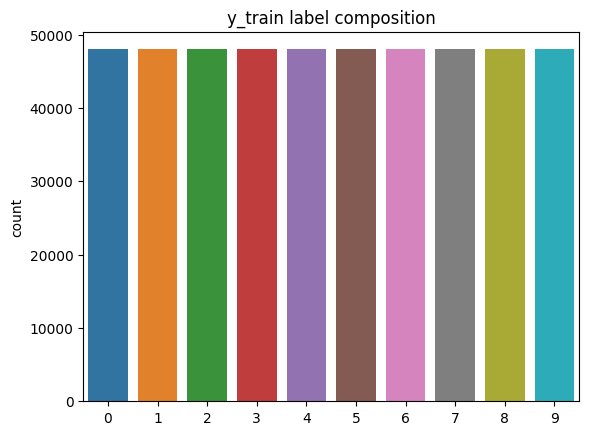

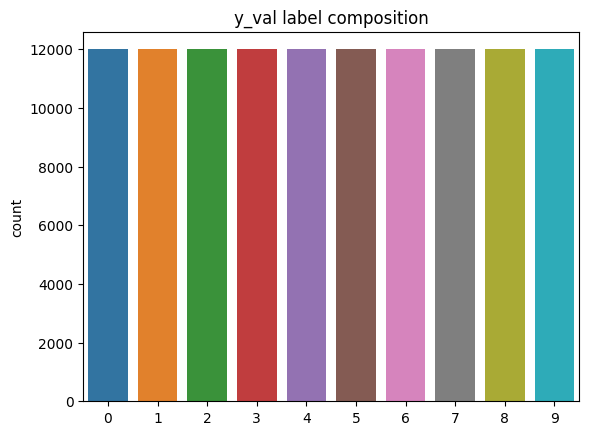

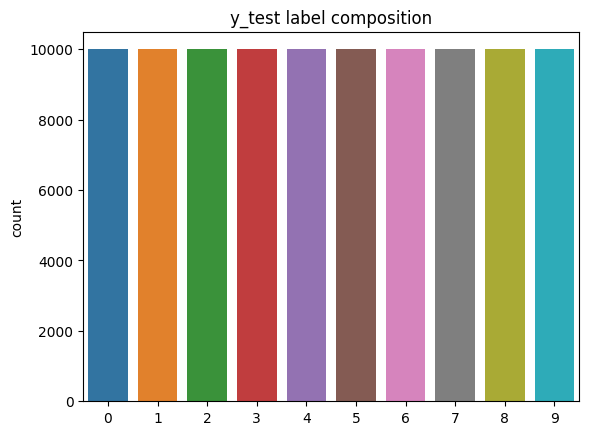

In [15]:
#check if stratify worked
listt=[y_train,y_val,y_test]
for  l,i in zip(['y_train','y_val','y_test'],listt):  
    plt.figure()
    sns.countplot(i)
    plt.title(l+' label composition')

# INITIALIZE THE MODEL

In [16]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


batch_size = 256
num_classes = 10
epochs = 40

#input image dimensions
img_cols =  28
img_rows  =  28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='uniform',
                 padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))



In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)         

# Annealing learning rate

In [18]:
optimizer = Adam(learning_rate = 0.001)

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5,  #factor by which the lr will be reduced lr*factor
                                            min_lr=0.00001)

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [21]:
X_train.shape[0]

48000

In [22]:
X_train.shape[0]

48000

# Fitting and Evaluating

In [23]:
%%time
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[learning_rate_reduction]     )

Epoch 1/40
188/188 [==============================] - 12s 14ms/step - loss: 0.7343 - accuracy: 0.7274 - val_loss: 0.4458 - val_accuracy: 0.8430 - lr: 0.0010
Epoch 2/40
188/188 [==============================] - 2s 11ms/step - loss: 0.4502 - accuracy: 0.8371 - val_loss: 0.3731 - val_accuracy: 0.8624 - lr: 0.0010
Epoch 3/40
188/188 [==============================] - 2s 13ms/step - loss: 0.3930 - accuracy: 0.8577 - val_loss: 0.3283 - val_accuracy: 0.8764 - lr: 0.0010
Epoch 4/40
188/188 [==============================] - 2s 13ms/step - loss: 0.3576 - accuracy: 0.8698 - val_loss: 0.3058 - val_accuracy: 0.8888 - lr: 0.0010
Epoch 5/40
188/188 [==============================] - 2s 11ms/step - loss: 0.3327 - accuracy: 0.8802 - val_loss: 0.3052 - val_accuracy: 0.8874 - lr: 0.0010
Epoch 6/40
188/188 [==============================] - 2s 12ms/step - loss: 0.3146 - accuracy: 0.8854 - val_loss: 0.2816 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 7/40
188/188 [==============================] - 3s 13ms/s

In [24]:
   
score = model.evaluate(X_test, y_test, verbose=0)

In [25]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18970878422260284
Test accuracy: 0.9329000115394592


# Plotting Learning Curves

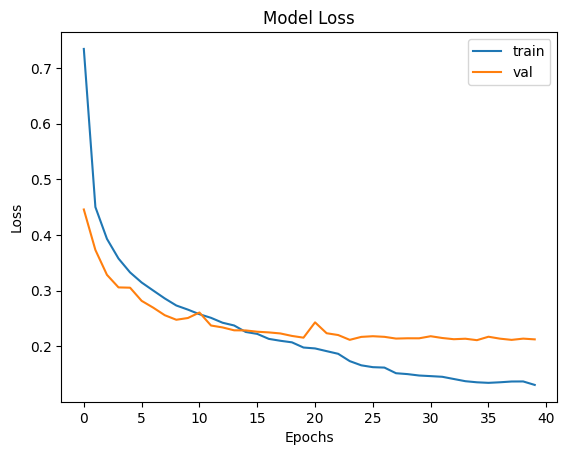

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

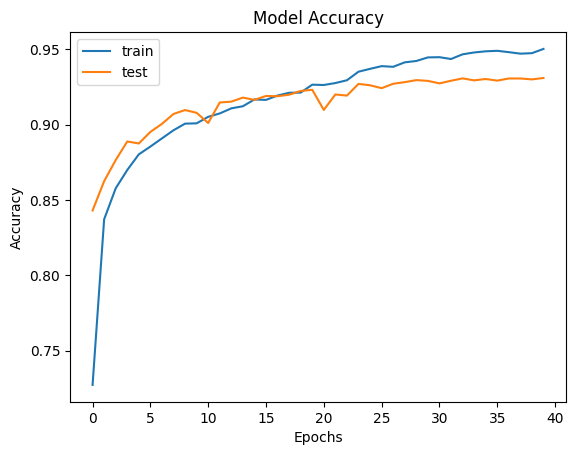

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
%%time
#get the predictions for the test data
predictions = np.argmax(model.predict(X_test), axis=-1)




313/313 [==============================] - 1s 2ms/step
CPU times: user 1.03 s, sys: 56.2 ms, total: 1.08 s
Wall time: 1.44 s


In [29]:
y_true = test.iloc[:, 0]
y_true=np.array(y_true)

#it give us the index where the conditions is met as a tuple
correct = np.nonzero(predictions==y_true)[0]
incorrect = np.nonzero(predictions!=y_true)[0]

In [30]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.90      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.89      0.90      1000
     Class 3       0.94      0.94      0.94      1000
     Class 4       0.89      0.91      0.90      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.82      0.79      0.80      1000
     Class 7       0.96      0.97      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# Visualize the model

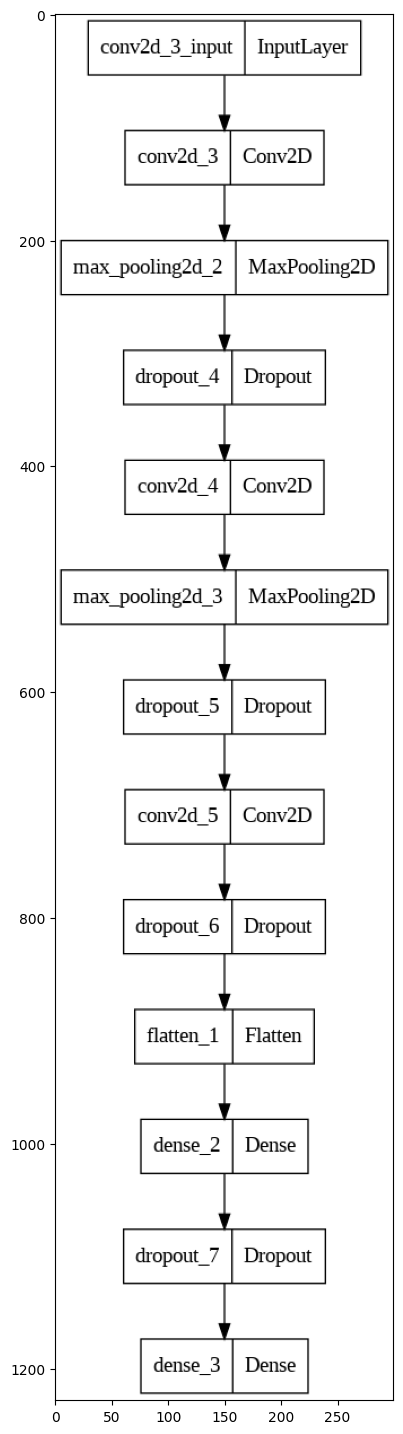

In [31]:
from keras.utils import plot_model

plt.figure(figsize = (25,18))
plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

# Visualize the first kernel

In [32]:

c1 = model.layers[0]
weights1 = c1.get_weights()
kernel = weights1[0][...,0, 0]#1 esimo kernel
kernel

array([[ 0.02037986,  0.03607244, -0.00701734],
       [ 0.00554672,  0.04250041, -0.02163163],
       [ 0.0674694 ,  0.02853846, -0.03954269]], dtype=float32)

In [33]:
#weights1 is a double list, 0 for the kernels, 1 for the biases

In [34]:
weights1[1].shape #THE BIAS

(32,)

In [35]:
weights1[0].shape  #KERNEL  3X3 IN GRAY=1, X32 KERNEL

(3, 3, 1, 32)

In [36]:
weights1[0][:,:,:,0] 

array([[[ 0.02037986],
        [ 0.03607244],
        [-0.00701734]],

       [[ 0.00554672],
        [ 0.04250041],
        [-0.02163163]],

       [[ 0.0674694 ],
        [ 0.02853846],
        [-0.03954269]]], dtype=float32)

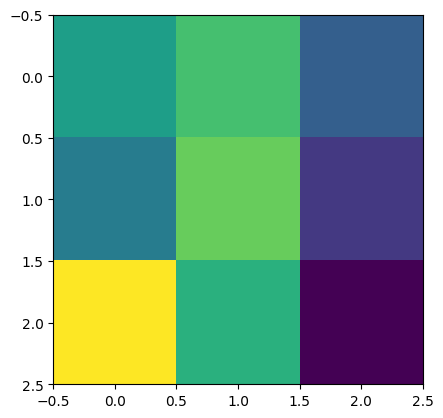

In [37]:
plt.imshow(kernel)

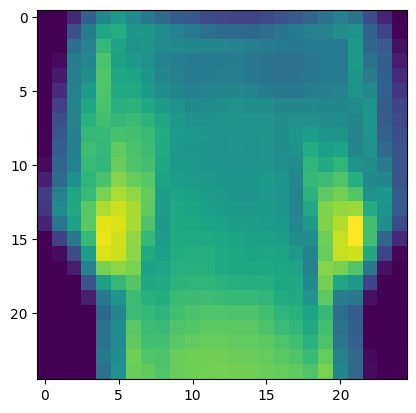

In [38]:
def conv(im, kernel):
    result=np.zeros((im.shape[0]-3, im.shape[1]-3))
    for ii in range(im.shape[0] - 3):
        for jj in range(im.shape[1] - 3):
                result[ii, jj] = (im[ii:ii+3, jj:jj+3] *kernel).sum()
    return result

    
plt.imshow(conv(X_test[5],kernel))

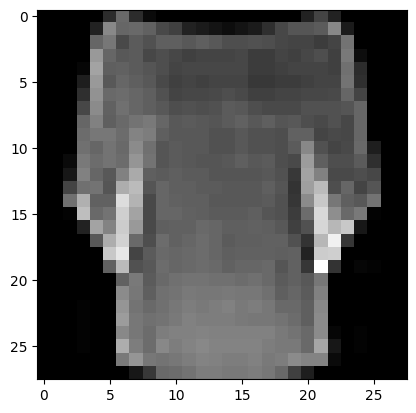

In [39]:
plt.imshow(X_test[5], cmap='gray')

# Visualize some correct and incorrect prediction

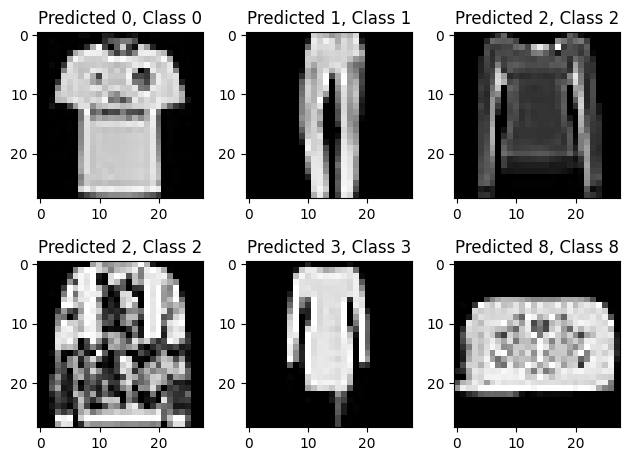

In [40]:


for i, z in enumerate(correct[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[z].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[z], y_true[z]))
    plt.tight_layout()

In [41]:
for i, z in enumerate(incorrect[:6]):
    print(i,z)

0 5
1 43
2 51
3 59
4 91
5 101


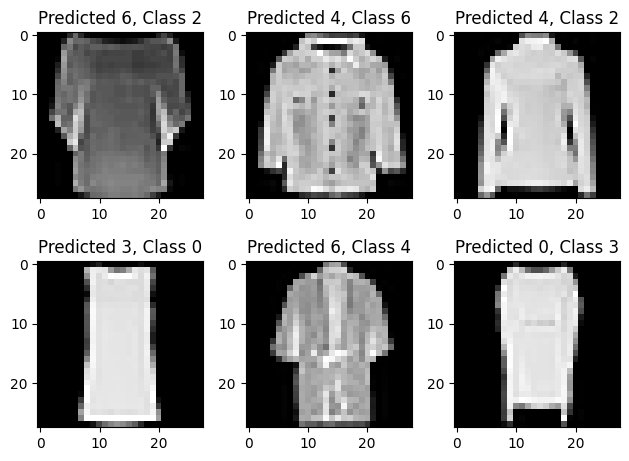

In [42]:
for i, z in enumerate(incorrect[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[z].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[z], y_true[z]))
    plt.tight_layout()

# Saving the model

In [43]:
from tensorflow.keras.models import load_model
model.save('model_file.h5')

Our accuracy in this multiclass classification problem is 93%, our moldel seems to have a problem recognizing shirts in particular.
